In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Amplitude Shift

In [18]:
root_folder = "to_evaluate"
exp_type = "amplitude_shift"
simple_metric_filename = "simple_metric_results.xlsx"
style_1_amplitude = "1.0_1.0"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{nb/2:0.1f}_{nb/2:0.1f}" for nb in range(10)]
folder_names.remove(style_1_amplitude)

ampl_labels = ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"]

In [19]:
def extract_results(exp_names:list, _exp_type:str, _root_folder:str=root_folder):
    idxs = list(itertools.product(exp_names, [0,1,2,3,4,5,6]))
    multi_index = pd.MultiIndex.from_tuples(idxs)
    _df_data = []

    for exp_name in exp_names:
        filepath = f"{_root_folder}/{_exp_type}/{exp_name}/{simple_metric_filename}"
        _df = pd.read_excel(filepath)
        _df = _df.drop(columns=["Unnamed: 0"])
        _df_values = _df.values
        _df_data.append(_df_values)

    _df_data = np.array(_df_data).reshape(-1, _df_values.shape[-1])
    return pd.DataFrame(data=_df_data, index=multi_index, columns=_df.columns)

amplitude_exp_values = extract_results(folder_names, exp_type)

In [20]:
def plot_label_result(
        _df:pd.DataFrame, 
        n_signal:int, 
        exp_types:list, 
        plot_labels:list, 
        title="a wonderfull title", xlabel="a marvelous x label", ylabel="an astonishing y label!"):
    
    idx = list(itertools.product(exp_types, [n_signal]))

    plt.figure(figsize=(18, 5))
    ax = plt.subplot(111)
    _df.loc[idx][plot_labels].plot(ax=ax, style=".-")

    ax.grid(True)
    ax.set_title(f"{title} on senssor {n_signal}.")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
# for i in range(7):
#     plot_label_result(amplitude_exp_values, i, folder_names, ["style1_extracted_ampl", "style2_extracted_ampl", "gen_s1_extracted_ampl", "gen_s2_extracted_ampl"])


In [21]:
# 
# title="a wonderfull title", xlabel="a marvelous x label", ylabel="an astonishing y label!"

def aggretate_results(
        df:pd.DataFrame, 
        sensor_to_use=[0,1,2,3,4,5]):
    
    idx = list(itertools.product(folder_names, sensor_to_use))

    return df.loc[idx].reset_index(0).groupby("level_0").mean()


def plot_results(
        df:pd.DataFrame,
        label_to_plot:list,
        title="A wonderfull title", 
        xlabel="A marvelous x label", 
        ylabel="An astonishing y label!"):
    
    plt.figure(figsize=(18, 10))
    ax = plt.subplot(111)

    df[label_to_plot].plot(ax=ax, style=".-")

    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


agreggated_results = aggretate_results(amplitude_exp_values)

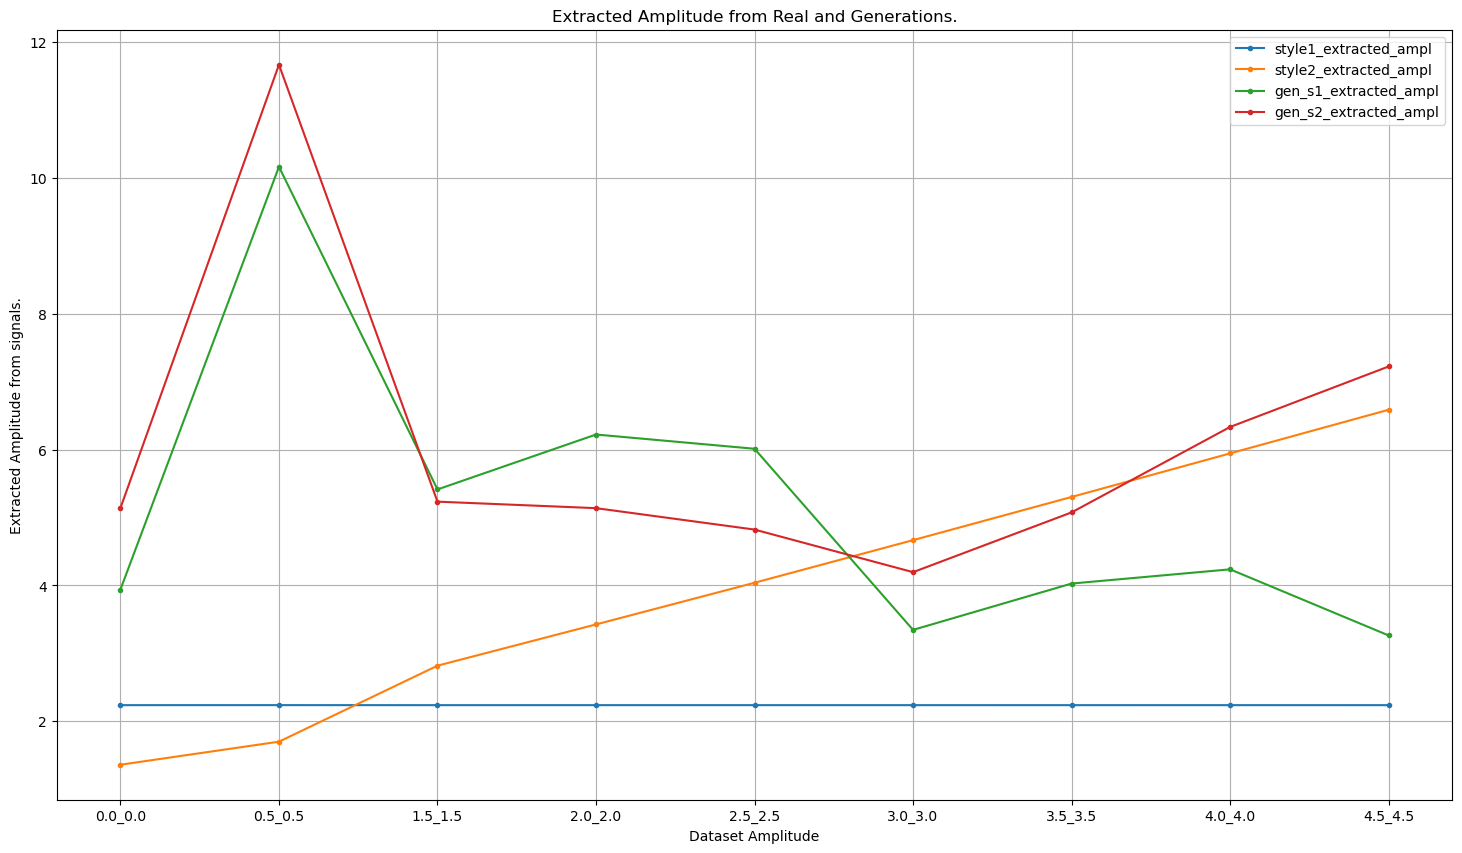

In [22]:
plot_results(
    agreggated_results, 
    ampl_labels, 
    title="Extracted Amplitude from Real and Generations.",
    xlabel="Dataset Amplitude",
    ylabel="Extracted Amplitude from signals.")

## Output Noise

In [23]:
exp_type = "output_noise"
simple_metric_filename = "simple_metric_results.xlsx"
style_1_amplitude = "0.50"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{0.25* (nb+1):0.2f}" for nb in range(10)]
# folder_names.remove(style_1_amplitude)

on_labels = ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"]

In [24]:
outpout_noise_df = extract_results(folder_names, exp_type)

In [25]:
# for i in range(7):
#     plot_label_result(outpout_noise_df, i, folder_names, ["style1_extracted_noise", "style2_extracted_noise", "gen_s1_extracted_noise", "gen_s2_extracted_noise"])

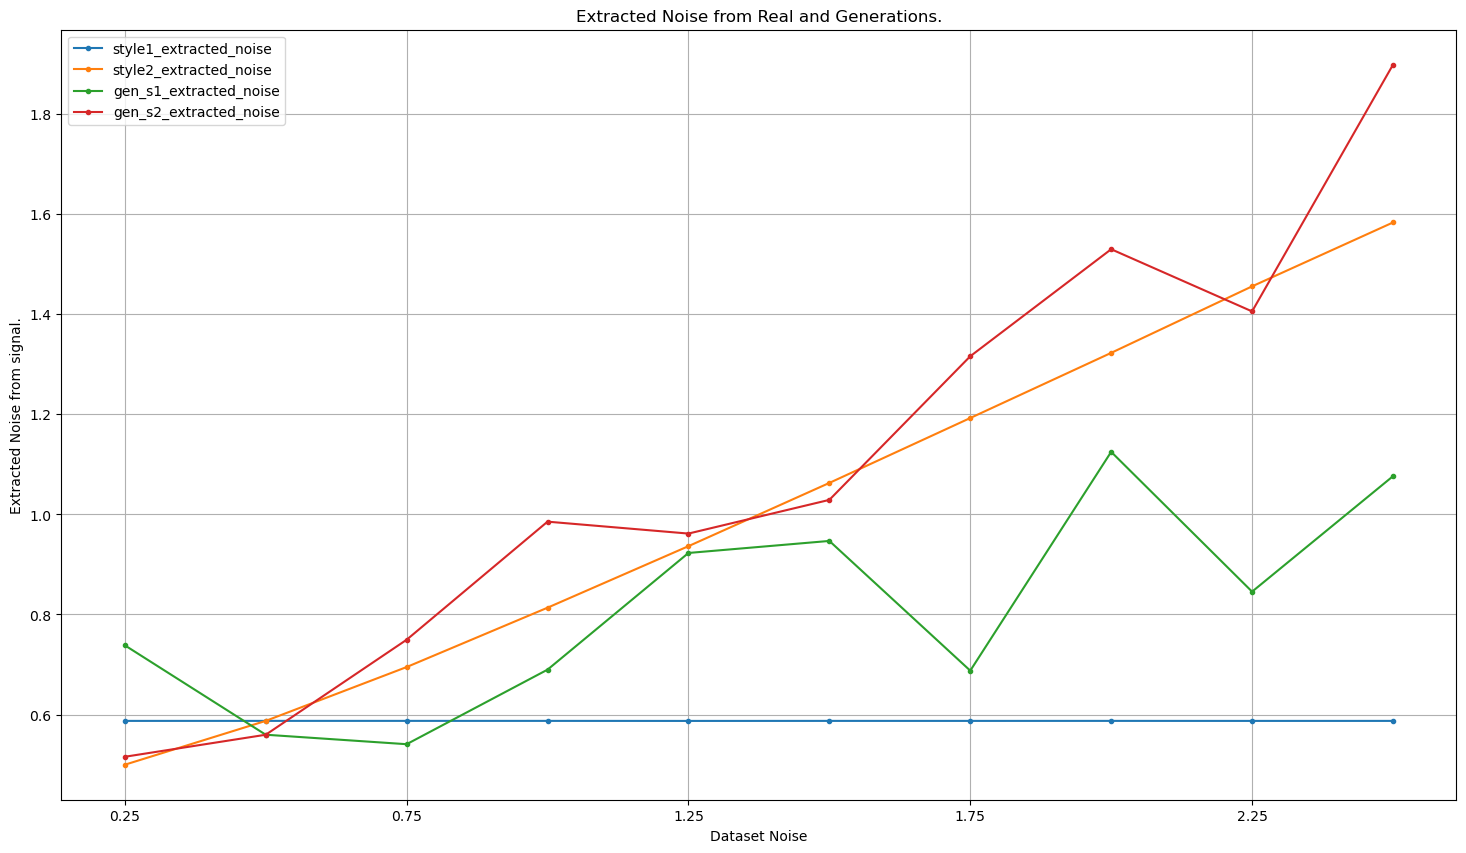

In [26]:
agg_out_noise_result = aggretate_results(outpout_noise_df)

plot_results(
    agg_out_noise_result, 
    on_labels, 
    title="Extracted Noise from Real and Generations.",
    xlabel="Dataset Noise",
    ylabel="Extracted Noise from signal.")

## Time Shift

In [27]:
exp_type = "time_shift"
simple_metric_filename = "simple_metric_results.xlsx"
style_1_amplitude = "0"

folder_path = f"{root_folder}/{exp_type}"
folder_names = [f"{nb*2:0.0f}" for nb in range(1, 10)]

ts_labels = ["real_s1_shifts", "real_s2_shifts", "fake_s1_shifts", "fake_s2_shifts"]

In [28]:
time_shift_results = extract_results(folder_names, exp_type)

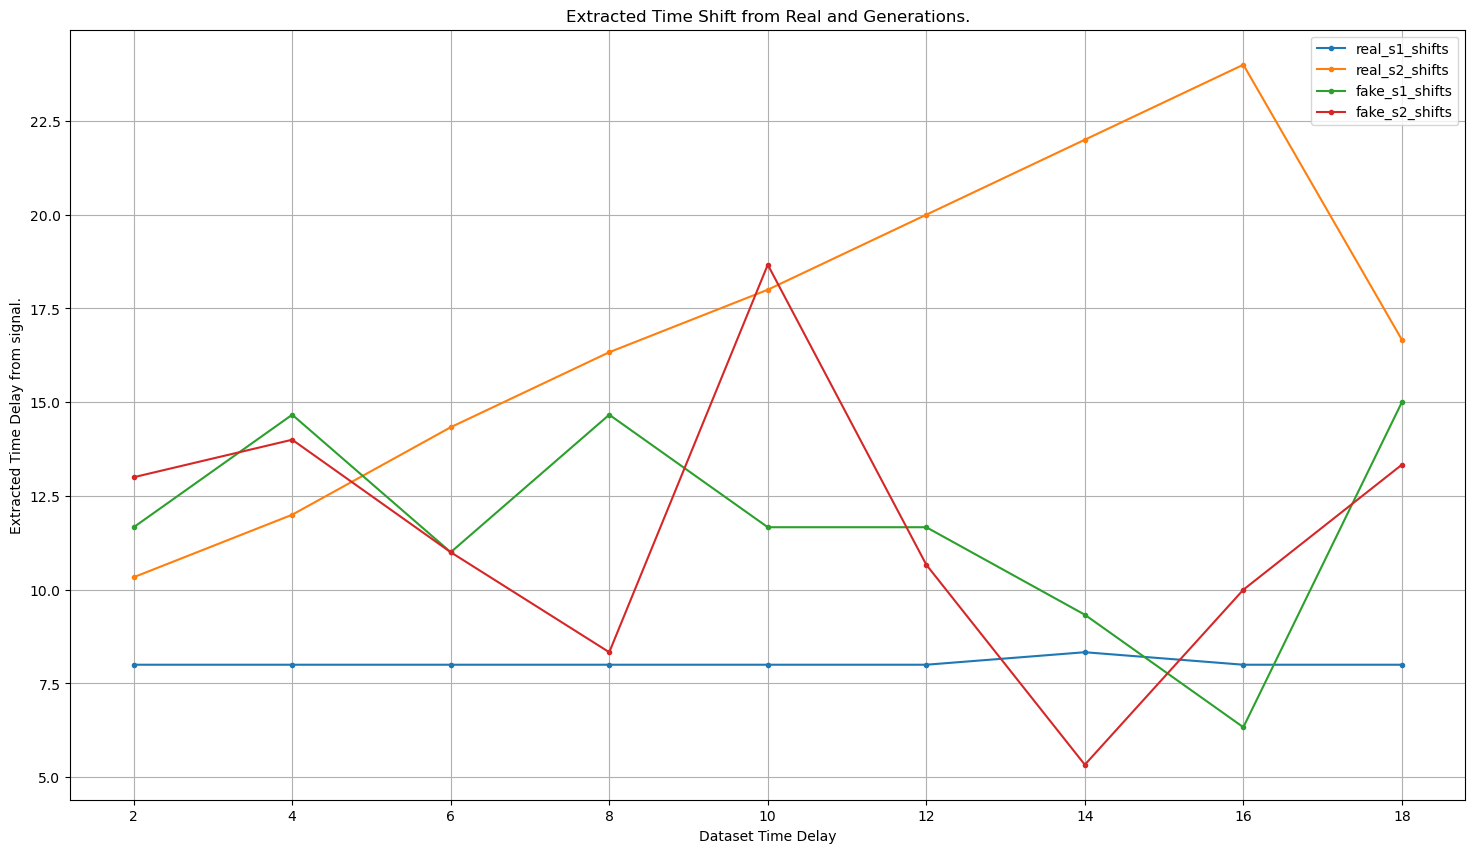

In [30]:
agg_ts_results = aggretate_results(time_shift_results, [2, 3, 4])
agg_ts_results.index = agg_ts_results.index.astype(int)
agg_ts_results = agg_ts_results.sort_index()

plot_results(
    agg_ts_results, 
    ts_labels,
    title="Extracted Time Shift from Real and Generations.",
    xlabel="Dataset Time Delay",
    ylabel="Extracted Time Delay from signal."
    )